<a href="https://colab.research.google.com/github/seungmindavid/Machine-Learning-2023/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Classification

- Idea:
$f(x) =
\begin{equation}
    \begin{cases}
      1 & w^T\hat{x} > 0.5\\
      0 & w^T\hat{x} \leq 0.5
    \end{cases}       
\end{equation}$

- Problem: Not differentiable.
- Solution: Using Sigmoid function
1. $\sigma(t) = \frac{1}{1+e^{-t}}$
2. $f(\sigma(w^T\hat{x})) = \frac{1}{1+e^{-w^T\hat{x}}}$

- Properties of sigmoid
1. $\sigma(-t) = 1-\sigma(t)$
2. $\frac{\partial\sigma(t)}{\partial t} = \sigma(t)(1-\sigma(t)) = \sigma(t)\sigma(-t)$

- Likelihood: $p(y|x,w) = f(x)^y(1-f(x))^{(1-y)}$, where $y \in {0,1}$, and $f(x)$ is the probability of belonging to y = 1.

## Negative Log Likelihood
$L(w) = -∑^N_{i=1}y^{(i)}\log(f(x^{(i)})) + (1-y{(i)})\log(1-f(x{(i)}))$
- $\nabla_wL(w): $

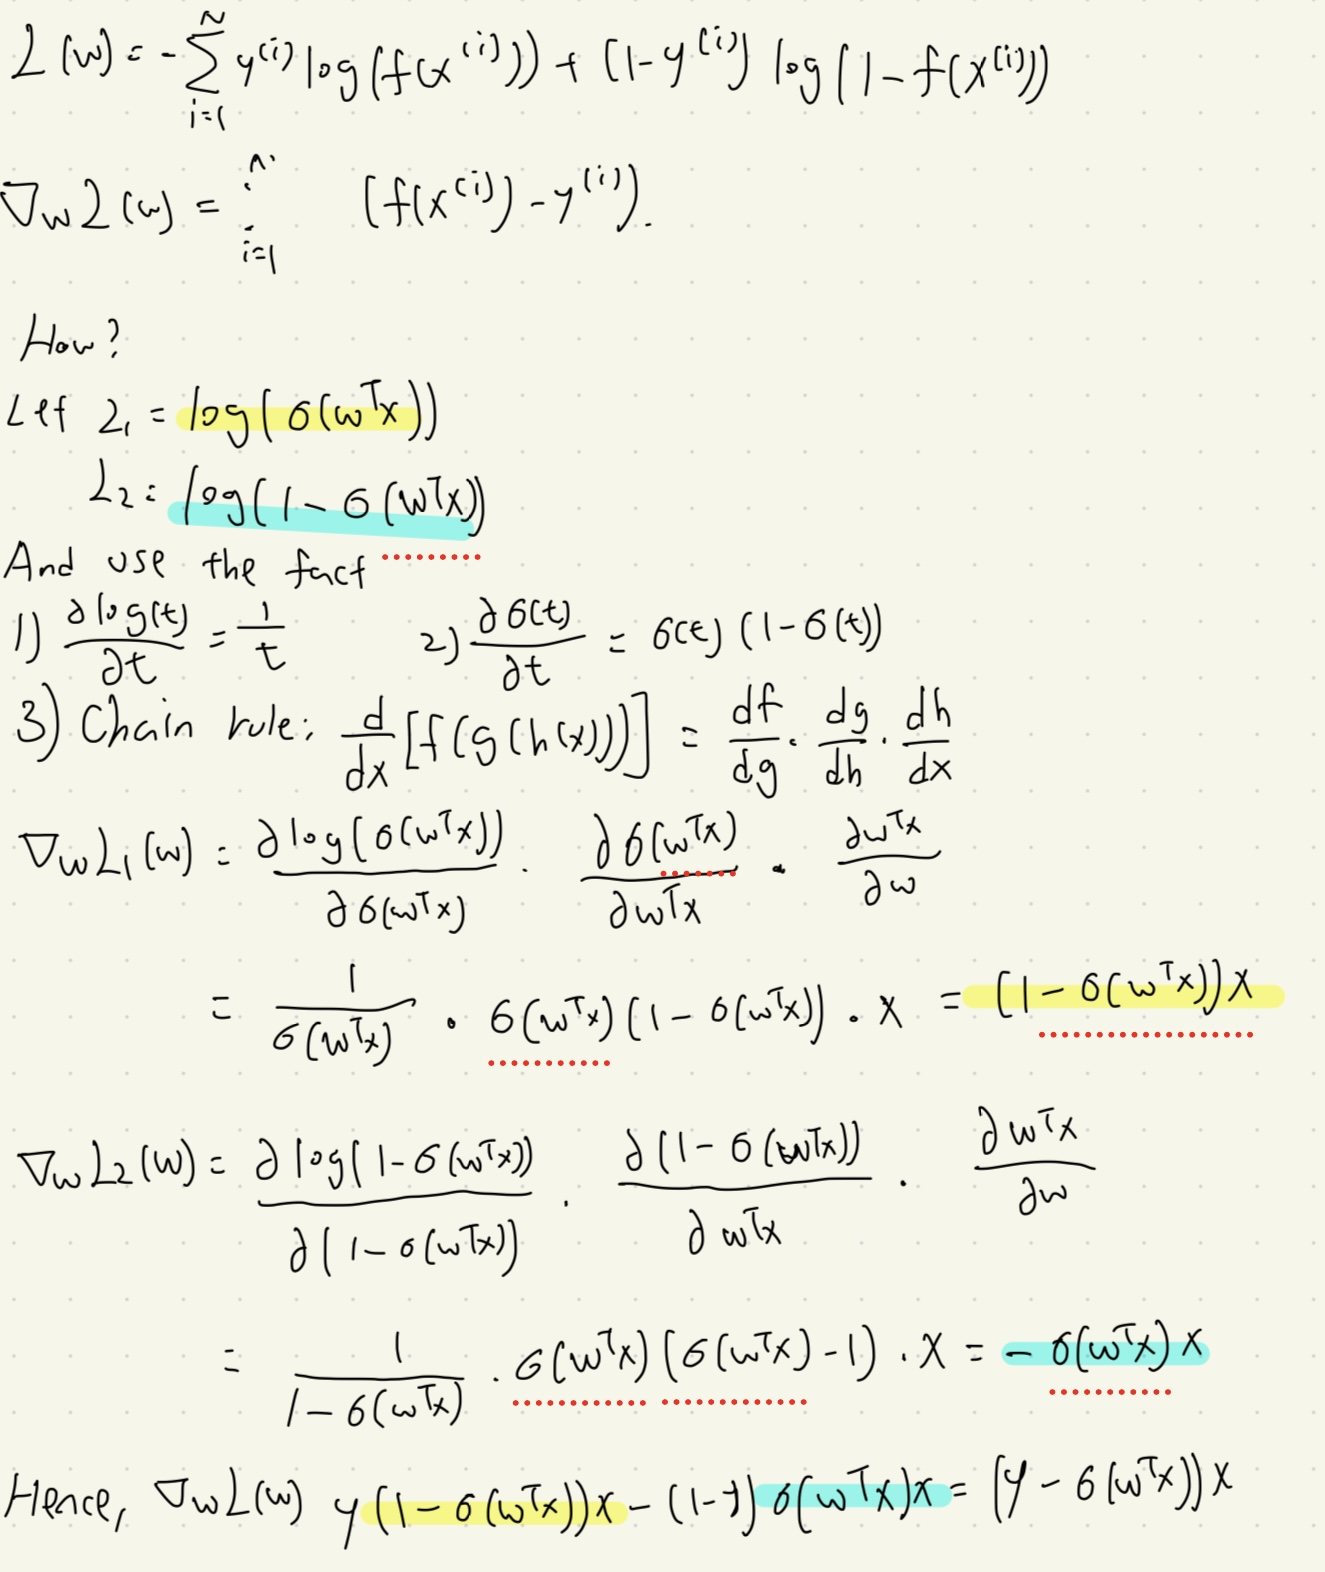

## Summary
- $x^{(i)} \in \mathbb{R}^2$, $\phi(x) = [1, x_1, x_2, x_1x_2, x_1^2, x_2^2]^T$
- Binary classifier: Sigmoid = $\sigma(t) = \frac{1}{1+e^{-t}}$
- Likelihood: $p(y|w,\phi(x)) = (\sigma(w^T\phi(x)))^y(1- \sigma(w^T\phi(x)))^{(1-y)}$
- Negative Log Likelihood:  $L(w) = -∑^N_{i=1}y^{(i)}\log(\sigma(w^T\phi(x^{(i)})))+(1-y^{(i)})\log(\sigma(w^T\phi(x^{(i)})))$ = $-∑^N_{i=1} y^{(i)}\log(\frac{1}{1+e^{w^T\phi(x^{(i)})}})+(1-y^{(i)})\log(\frac{1}{1+e^{w^T\phi(x^{(i)})}})$
- $∇_wL(w) = \sum^N_{i=1}\phi(x^{(i)})(\sigma(w^T\phi(x^{(i)}))-y^{(i)})$
- Gradient descent: $w^{t+1} = w^t - \epsilon ∇_wL(w)$ where $\epsilon$ = learning rate.
- If Φ is invertible, $w^* = (Φ^TΦ)^{-1}Φ^Ty$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

import cv2

In [3]:
# NEED CODE BELOW
x_train = df['x_train']
x_test = df['x_test']
y_train = df['y_train']
y_test = df['y_test']

x1_train = x_train[:, 0]
x2_train = x_train[:, 1]
x1_test = x_test[:,0]
x2_test = x_test[:,1]

X_train = np.column_stack((np.ones((x1_train.shape[0], 1)), x1_train, x2_train, x1_train*x2_train, x1_train**2, x2_train**2))
X_test = np.column_stack((np.ones((x1_test.shape[0], 1)), x1_test, x2_test, x1_test*x2_test, x1_test**2, x2_test**2))

In [4]:
def sigmoid(t):
  return 1/(1+np.exp(-t))

def nll(X,y,w):
  m = y.shape[0]
  ones = np.ones(m)
  y_pred = sigmoid(np.dot(X,w))
  l_w = -np.sum(y*np.log(y_pred) + (ones-y)*np.log(y_pred))
  return l_w

def gd_bianry(X,y,lr,num_epoches):
  m,n = X.shape
  w = np.zeros(n)
  for epoch in range(0, num_epoches):
    y_pred = sigmoid(np.dot(X,w))
    gradient = np.dot(X.T, (y_pred - y))
    w -= lr*gradient
  return w


## From Binary to Multi-Class Classification
- Winner takes all (One vs all)

In [5]:
def multi_class_classifier(X,y,lr,num_epoches,num_classes):
  m,n = X.shape
  classifiers = np.zeros((num_classes,n))

  for class_label in range(num_classes):
    w = gd_bianry(X, np.where(y == class_label, 1, 0), lr, num_epoches)
    classifiers[class_label] = w
  return classifiers

In [6]:
lr = 1e-2
num_epoches = 1000
num_classes = 3

classifiers = multi_class_classifier(X_train, y_train, lr, num_epoches, num_classes)

scores = np.zeros((X_train.shape[0], 3))
for class_label, classifier in enumerate(classifiers):
  scores[:, class_label] = sigmoid(np.dot(X_train, classifier))

predicted_classes = np.argmax(scores, axis=1)
print('Train data accuracy: ')
print(sum(predicted_classes == y_train)/y_train.shape[0])


classifiers = multi_class_classifier(X_test, y_test, lr, num_epoches, num_classes)

scores = np.zeros((x2_test.shape[0], 3))
for class_label, classifier in enumerate(classifiers):
  scores[:, class_label] = sigmoid(np.dot(X_test, classifier))

predicted_classes = np.argmax(scores, axis=1)
print('Test data accuracy: ')
print(sum(predicted_classes == y_test)/y_test.shape[0])



<ipython-input-4-2c9523a90641>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


Train data accuracy: 
0.9633333333333334
Test data accuracy: 
0.9933333333333333
